In [3]:
##Estimación de indicadores de población ocupada en cultura
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate, showtext,srvyr,foreign)
font_add_google("Poppins", "pop")
showtext_auto()
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)

Using GitHub PAT from the git credential store.




rlang (1.1.4 -> 1.1.6) [CRAN]
glue  (1.7.0 -> 1.8.0) [CRAN]
cli   (3.6.3 -> 3.6.5) [CRAN]


Installing 3 packages: rlang, glue, cli

Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\RtmpULZAGh\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\RtmpULZAGh\remotes64c078b25c0e\cpyp-ipdp-funcionespgd-8b2a39e/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Warning message:
"package 'funcionespgd' is in use and will not be installed"


In [4]:
pib<- read_csv("desarrollo_económico/pibpc_cdmx.csv")%>%
janitor::clean_names()%>%
rename(year=ano)%>%
mutate(year=as.numeric(year))%>%
select(year,pibpc)%>%
intervals("pibpc", margen = 0.004, año_base = 2024)
pib

Rows: 43 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): año, pib, tasa_crecimiento, poblacion, pibpc

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,estimado,superior,inferior
<dbl>,<dbl>,<dbl>,<dbl>
2003,320194.1,320194.1,320194.1
2004,331668.6,331668.6,331668.6
2005,333186.1,333186.1,333186.1
2006,348179.9,348179.9,348179.9
2007,348701.3,348701.3,348701.3
2008,352824.7,352824.7,352824.7
2009,333230.2,333230.2,333230.2
2010,345606.4,345606.4,345606.4
2011,356109.6,356109.6,356109.6


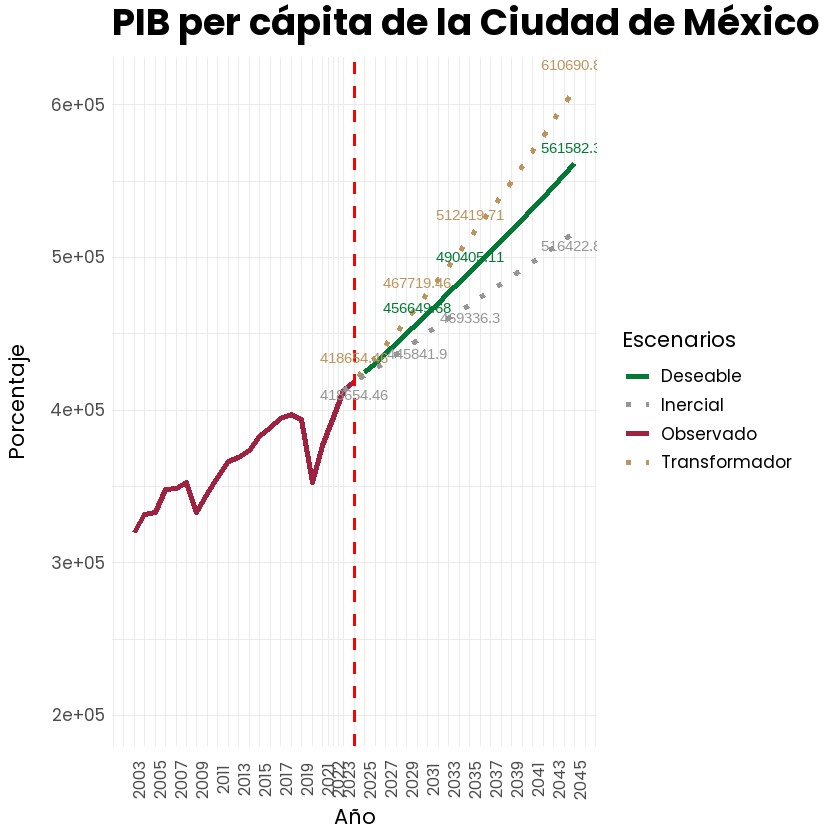

In [9]:
grafica_bonita(
  data = pib,
  x = "year",
  y = "estimado",
  titulo = "PIB per cápita de la Ciudad de México",
  linea_vertical = 2024,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 200000
)

ggsave("desarrollo_económico/pib_percapita_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")

In [10]:
ied<- read_csv("desarrollo_económico/ied_cdmx.csv")%>%
janitor::clean_names()%>%
rename(year=ano)%>%
mutate(year=as.numeric(year))%>%
select(year,porcentaje)%>%
intervals("porcentaje", margen = 0.004, año_base = 2024)
ied

Rows: 41 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): año, porcentaje

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,estimado,superior,inferior
<dbl>,<dbl>,<dbl>,<dbl>
2006,26.704807,26.704807,26.704807
2007,21.397919,21.397919,21.397919
2008,26.179828,26.179828,26.179828
2009,29.436927,29.436927,29.436927
2010,14.948750,14.948750,14.948750
2011,29.289335,29.289335,29.289335
2012,6.143795,6.143795,6.143795
2013,12.067843,12.067843,12.067843
2014,20.186236,20.186236,20.186236


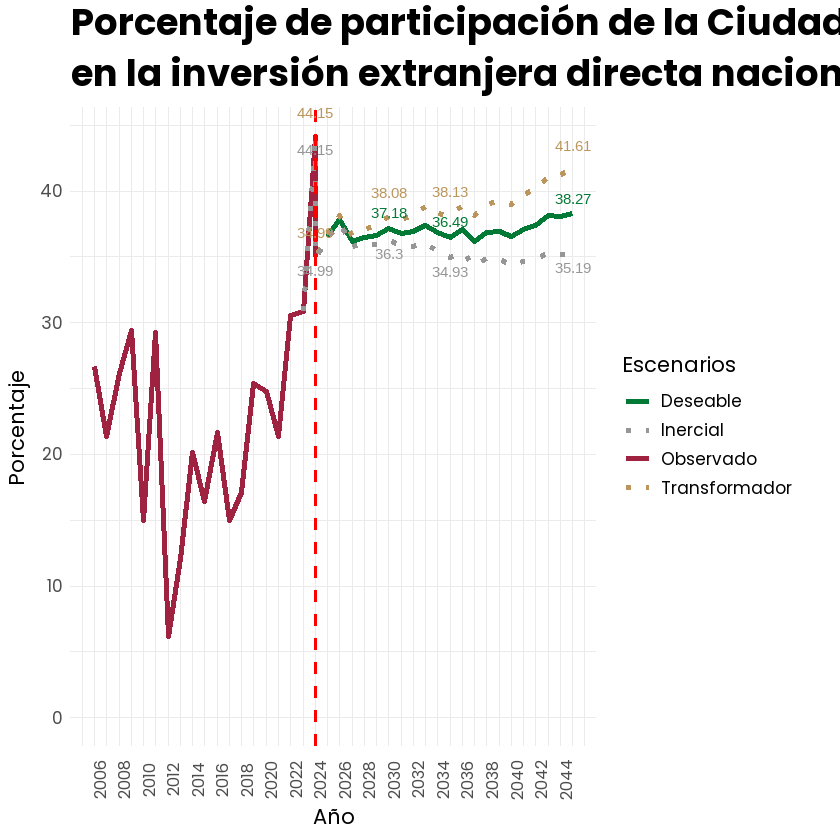

In [11]:
grafica_bonita(
  data = ied,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de participación de la Ciudad de México 
en la inversión extranjera directa nacional",
  linea_vertical = 2024,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("desarrollo_económico/ied_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")